# 数据聚合与分组运算
- GroupBy技术
    - 对分组进行迭代
    - 选取一个或一组列
    - 通过字典或Series进行分组
    - 通过函数进行分组
    - 根据索引级别分组
- 数据聚合
    - 面向列的多函数应用
    - 以『无索引』的形式返回聚合数据
- 分组级运算和转换
    - Apply: 一般性的 split-apply-combine
    - 示例：用特定于分组的值填充缺失值
    - 示例：随机采样和排列
    - 示例：分组加权平均数和相关系数
    - 示例：面向分组的线性回归
- 透视表和交叉表
    - 交叉表: crosstab
- 示例：2012联邦选举委员会数据库
    - 根据职业和雇主统计赞助信息
    - 对出资额分组
    - 根据州统计赞助信息

In [4]:
# coding:utf-8
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
%pwd

u'/Users/zhangjun/Documents/machine-learning-notes/data-processing'

In [5]:
%matplotlib inline

## GroupBy技术

In [2]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,1.026613,1.161406,a,one
1,0.417388,0.106243,a,two
2,-0.293266,1.973232,b,one
3,1.063764,1.324541,b,two
4,-0.046985,-1.239778,a,one


In [3]:
grouped = df['data1'].groupby(df['key1'])
grouped.mean()

key1
a    0.465672
b    0.385249
Name: data1, dtype: float64

In [4]:
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
means

key1  key2
a     one     0.489814
      two     0.417388
b     one    -0.293266
      two     1.063764
Name: data1, dtype: float64

In [5]:
means.unstack()

key2,one,two
key1,,
a,0.489814,0.417388
b,-0.293266,1.063764


In [6]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states, years]).mean()

California  2005    0.417388
            2006   -0.293266
Ohio        2005    1.045188
            2006   -0.046985
Name: data1, dtype: float64

In [7]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.465672,0.009291
b,0.385249,1.648887


In [8]:
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one   0.489814 -0.039186
     two   0.417388  0.106243
b    one  -0.293266  1.973232
     two   1.063764  1.324541

In [9]:
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 对分组进行迭代

In [10]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
      data1     data2 key1 key2
0  1.026613  1.161406    a  one
1  0.417388  0.106243    a  two
4 -0.046985 -1.239778    a  one
b
      data1     data2 key1 key2
2 -0.293266  1.973232    b  one
3  1.063764  1.324541    b  two


In [11]:
for (k1, k2), group in df.groupby(['key1', 'key2']):
    print((k1, k2))
    print(group)

('a', 'one')
      data1     data2 key1 key2
0  1.026613  1.161406    a  one
4 -0.046985 -1.239778    a  one
('a', 'two')
      data1     data2 key1 key2
1  0.417388  0.106243    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.293266  1.973232    b  one
('b', 'two')
      data1     data2 key1 key2
3  1.063764  1.324541    b  two


In [12]:
list(df.groupby('key1'))

[('a',       data1     data2 key1 key2
  0  1.026613  1.161406    a  one
  1  0.417388  0.106243    a  two
  4 -0.046985 -1.239778    a  one), ('b',       data1     data2 key1 key2
  2 -0.293266  1.973232    b  one
  3  1.063764  1.324541    b  two)]

In [13]:
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-0.293266,1.973232,b,one
3,1.063764,1.324541,b,two


In [14]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [15]:
grouped = df.groupby(df.dtypes, axis=1) #axis=0按行，axis=1按列
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  1.026613  1.161406
 1  0.417388  0.106243
 2 -0.293266  1.973232
 3  1.063764  1.324541
 4 -0.046985 -1.239778, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### 选取一个或一组列

In [16]:
df.groupby(['key1', 'key2'])[['data2']].mean()

data2
key1 key2          
a    one  -0.039186
     two   0.106243
b    one   1.973232
     two   1.324541

In [18]:
s_grouped = df.groupby(['key1', 'key2'])['data2']
s_grouped.mean()

key1  key2
a     one    -0.039186
      two     0.106243
b     one     1.973232
      two     1.324541
Name: data2, dtype: float64

### 通过字典或Series进行分组

In [19]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
people

,a,b,c,d,e
Joe,0.358930,2.024090,-0.599601,-0.002814,-1.340258
Steve,1.195250,0.347794,-1.085674,-0.575527,-0.003448
Wes,0.669215,NaN,NaN,0.765904,-1.124655
Jim,0.794408,0.441755,0.024958,-0.259655,0.050725
Travis,1.540916,-0.771560,-0.328605,0.835553,-0.464511


In [21]:
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}
by_column = people.groupby(mapping, axis=1)
by_column.sum()

,blue,red
Joe,-0.602415,1.042762
Steve,-1.661201,1.539595
Wes,0.765904,-0.455439
Jim,-0.234697,1.286888
Travis,0.506948,0.304846


In [22]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [23]:
people.groupby(map_series, axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 通过函数进行分组

In [24]:
people.groupby(len).sum()

,a,b,c,d,e
3,1.822554,2.465845,-0.574643,0.503434,-2.414188
5,1.195250,0.347794,-1.085674,-0.575527,-0.003448
6,1.540916,-0.771560,-0.328605,0.835553,-0.464511


In [25]:
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one  0.358930  2.024090 -0.599601 -0.002814 -1.340258
  two  0.794408  0.441755  0.024958 -0.259655  0.050725
5 one  1.195250  0.347794 -1.085674 -0.575527 -0.003448
6 two  1.540916 -0.771560 -0.328605  0.835553 -0.464511

### 根据索引级别分组

In [26]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                    [1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -0.714519 -0.350638  0.923435 -0.313954  1.045320
1     -0.659074 -0.629499 -1.181285 -1.247931 -0.203397
2      0.817443 -0.131843 -2.019166  0.466756  0.872897
3     -0.204547 -0.089299  0.777221  1.623513  1.504129

In [27]:
hier_df.groupby(level='cty', axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 数据聚合

In [28]:
df

,data1,data2,key1,key2
0,1.026613,1.161406,a,one
1,0.417388,0.106243,a,two
2,-0.293266,1.973232,b,one
3,1.063764,1.324541,b,two
4,-0.046985,-1.239778,a,one


In [29]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9) #样本分位数

key1
a    0.904768
b    0.928061
Name: data1, dtype: float64

In [30]:
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,1.073597,2.401184
b,1.357029,0.648691


In [31]:
grouped.describe()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean   0.465672  0.009291
     std    0.538425  1.203524
     min   -0.046985 -1.239778
     25%    0.185202 -0.566767
     50%    0.417388  0.106243
     75%    0.722000  0.633825
     max    1.026613  1.161406
b    count  2.000000  2.000000
     mean   0.385249  1.648887
     std    0.959565  0.458694
     min   -0.293266  1.324541
     25%    0.045992  1.486714
     50%    0.385249  1.648887
     75%    0.724506  1.811060
     max    1.063764  1.973232

In [33]:
tips = pd.read_csv('data/tips.csv')
# Add tip percentage of total bill
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips[:6]

,total_bill,tip,sex,smoker,day,time,peoplesize,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### 面向列的多函数应用

In [35]:
grouped = tips.groupby(['sex', 'smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [36]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [37]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [38]:
functions = ['count', 'mean', 'max']
result = grouped['tip_pct', 'total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [39]:
result['tip_pct']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [40]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped['tip_pct', 'total_bill'].agg(ftuples)

tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

In [41]:
grouped.agg({'tip' : np.max, 'peoplesize' : 'sum'})

peoplesize   tip
sex    smoker                  
Female No             140   5.2
       Yes             74   6.5
Male   No             263   9.0
       Yes            150  10.0

In [42]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'peoplesize' : 'sum'})

tip_pct                               peoplesize
                    min       max      mean       std        sum
sex    smoker                                                   
Female No      0.056797  0.252672  0.156921  0.036421        140
       Yes     0.056433  0.416667  0.182150  0.071595         74
Male   No      0.071804  0.291990  0.160669  0.041849        263
       Yes     0.035638  0.710345  0.152771  0.090588        150

### 以『无索引』的形式返回聚合数据

In [43]:
tips.groupby(['sex', 'smoker'], as_index=False).mean()

,sex,smoker,total_bill,tip,peoplesize,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [44]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip  peoplesize   tip_pct
sex    smoker                                            
Female No       18.105185  2.773519    2.592593  0.156921
       Yes      17.977879  2.931515    2.242424  0.182150
Male   No       19.791237  3.113402    2.711340  0.160669
       Yes      22.284500  3.051167    2.500000  0.152771

## 分组级运算和转换

In [45]:
df

,data1,data2,key1,key2
0,1.026613,1.161406,a,one
1,0.417388,0.106243,a,two
2,-0.293266,1.973232,b,one
3,1.063764,1.324541,b,two
4,-0.046985,-1.239778,a,one


In [48]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,0.465672,0.009291
b,0.385249,1.648887


In [49]:
pd.merge(df, k1_means, left_on='key1', right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,1.026613,1.161406,a,one,0.465672,0.009291
1,0.417388,0.106243,a,two,0.465672,0.009291
4,-0.046985,-1.239778,a,one,0.465672,0.009291
2,-0.293266,1.973232,b,one,0.385249,1.648887
3,1.063764,1.324541,b,two,0.385249,1.648887


In [50]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.856354,0.626265,-0.464103,0.532881,-0.976475
two,0.994829,0.394774,-0.530358,-0.417591,0.023638


In [51]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.856354,0.626265,-0.464103,0.532881,-0.976475
Steve,0.994829,0.394774,-0.530358,-0.417591,0.023638
Wes,0.856354,0.626265,-0.464103,0.532881,-0.976475
Jim,0.994829,0.394774,-0.530358,-0.417591,0.023638
Travis,0.856354,0.626265,-0.464103,0.532881,-0.976475


In [52]:
def demean(arr):
    return arr - arr.mean()
demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.497424,1.397825,-0.135498,-0.535695,-0.363784
Steve,0.200421,-0.046981,-0.555316,-0.157936,-0.027087
Wes,-0.187139,NaN,NaN,0.233023,-0.148180
Jim,-0.200421,0.046981,0.555316,0.157936,0.027087
Travis,0.684562,-1.397825,0.135498,0.302672,0.511964


In [53]:
demeaned.groupby(key).mean()

,a,b,c,d,e
one,1.110223e-16,0.000000e+00,0.000000e+00,7.401487e-17,7.401487e-17
two,0.000000e+00,2.775558e-17,5.551115e-17,-2.775558e-17,1.734723e-18


### Apply: 一般性的 split-apply-combine

In [54]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,peoplesize,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [55]:
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  peoplesize  \
smoker                                                                  
No     88        24.71  5.85    Male     No  Thur   Lunch           2   
       185       20.69  5.00    Male     No   Sun  Dinner           5   
       51        10.29  2.60  Female     No   Sun  Dinner           2   
       149        7.51  2.00    Male     No  Thur   Lunch           2   
       232       11.61  3.39    Male     No   Sat  Dinner           2   
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner           2   
       183       23.17  6.50    Male    Yes   Sun  Dinner           4   
       67         3.07  1.00  Female    Yes   Sat  Dinner           1   
       178        9.60  4.00  Female    Yes   Sun  Dinner           2   
       172        7.25  5.15    Male    Yes   Sun  Dinner           2   

             tip_pct  
smoker                
No     88   0.236746  
       185  0.241663  
       51   0.252672  
       149  0.266312  
       232  0.291990  
Yes    109  0.279525  
       183  0.280535  
       67   0.325733  
       178  0.416667  
       172  0.710345

In [56]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip     sex smoker   day    time  peoplesize  \
smoker day                                                                    
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner           2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner           4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner           6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch           5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner           4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner           3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner           3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch           4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [57]:
result = tips.groupby('smoker')['tip_pct'].describe()
result

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64

In [58]:
result.unstack('smoker')

smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


#### 禁止分组键

In [59]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,sex,smoker,day,time,peoplesize,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


### 分位数和桶分析

In [60]:
frame = DataFrame({'data1': np.random.randn(1000),
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

0       (-0.397, 1.2]
1    (-1.993, -0.397]
2       (-0.397, 1.2]
3       (-0.397, 1.2]
4       (-0.397, 1.2]
5    (-1.993, -0.397]
6       (-0.397, 1.2]
7    (-1.993, -0.397]
8    (-1.993, -0.397]
9        (1.2, 2.797]
Name: data1, dtype: category
Categories (4, object): [(-3.596, -1.993] < (-1.993, -0.397] < (-0.397, 1.2] < (1.2, 2.797]]

In [61]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

#ADAPT the output is not sorted in the book while this is the case now (swap first two lines)

,count,max,mean,min
data1,,,,
"(-3.596, -1.993]",24.0,0.925419,-0.195187,-2.442734
"(-1.993, -0.397]",331.0,2.368136,0.038970,-2.782686
"(-0.397, 1.2]",538.0,3.062379,-0.026906,-3.084719
"(1.2, 2.797]",107.0,2.746729,0.097501,-2.088028


In [62]:
# Return quantile numbers
grouping = pd.qcut(frame.data1, 10, labels=False)

grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,1.807745,-0.135077,-2.782686
1,100.0,2.144406,0.063406,-2.350521
2,100.0,2.260061,0.211461,-2.109160
3,100.0,2.368136,-0.040446,-2.662069
4,100.0,2.066366,-0.044732,-3.084719
5,100.0,1.974320,0.051900,-1.824620
6,100.0,2.445876,-0.077611,-2.632167
7,100.0,2.392220,-0.112644,-2.990068
8,100.0,3.062379,0.009197,-2.368211


### 示例：用特定于分组的值填充缺失值

In [63]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.813799
2         NaN
3    0.484321
4         NaN
5   -0.766483
dtype: float64

In [64]:
s.fillna(s.mean())

0   -0.365320
1   -0.813799
2   -0.365320
3    0.484321
4   -0.365320
5   -0.766483
dtype: float64

In [65]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -0.244276
New York     -1.361413
Vermont            NaN
Florida      -0.520488
Oregon       -0.234210
Nevada             NaN
California   -1.264127
Idaho              NaN
dtype: float64

In [66]:
data.groupby(group_key).mean()

East   -0.708726
West   -0.749169
dtype: float64

In [67]:
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -0.244276
New York     -1.361413
Vermont      -0.708726
Florida      -0.520488
Oregon       -0.234210
Nevada       -0.749169
California   -1.264127
Idaho        -0.749169
dtype: float64

In [68]:
fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -0.244276
New York     -1.361413
Vermont       0.500000
Florida      -0.520488
Oregon       -0.234210
Nevada       -1.000000
California   -1.264127
Idaho        -1.000000
dtype: float64

### 示例：随机采样和排列

In [69]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [70]:
def draw(deck, n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck) #从整副牌中抽取5张

2H    2
AH    1
9S    9
7C    7
4C    4
dtype: int64

In [71]:
get_suit = lambda card: card[-1] # last letter is suit
deck.groupby(get_suit).apply(draw, n=2)

C  5C     5
   AC     1
D  9D     9
   QD    10
H  2H     2
   QH    10
S  QS    10
   8S     8
dtype: int64

In [72]:
# alternatively
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

9C     9
7C     7
6D     6
7D     7
4H     4
KH    10
QS    10
8S     8
dtype: int64

### 示例：分组加权平均数和相关系数

In [73]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-0.506311,0.313335
1,a,-0.426485,0.876197
2,a,0.784822,0.629774
3,a,0.586530,0.316156
4,b,1.500749,0.118941
5,b,-0.113703,0.082462
6,b,-0.318279,0.861943
7,b,-1.279937,0.733483


In [74]:
grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

category
a    0.069009
b   -0.581038
dtype: float64

In [76]:
close_px = pd.read_csv('data/stock_px.csv', parse_dates=True, index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [77]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [78]:
rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [79]:
# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

### 示例：面向分组的线性回归

In [80]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [81]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 透视表和交叉表

In [82]:
tips.pivot_table(index=['sex', 'smoker'])

peoplesize       tip   tip_pct  total_bill
sex    smoker                                            
Female No        2.592593  2.773519  0.156921   18.105185
       Yes       2.242424  2.931515  0.182150   17.977879
Male   No        2.711340  3.113402  0.160669   19.791237
       Yes       2.500000  3.051167  0.152771   22.284500

In [83]:
tips.pivot_table(['tip_pct', 'size'], index=['sex', 'day'],
                 columns='smoker')

tip_pct          
smoker             No       Yes
sex    day                     
Female Fri   0.165296  0.209129
       Sat   0.147993  0.163817
       Sun   0.165710  0.237075
       Thur  0.155971  0.163073
Male   Fri   0.138005  0.144730
       Sat   0.162132  0.139067
       Sun   0.158291  0.173964
       Thur  0.165706  0.164417

In [84]:
tips.pivot_table(['tip_pct', 'peoplesize'], index=['sex', 'day'],
                 columns='smoker', margins=True)

tip_pct                     peoplesize                    
smoker             No       Yes       All         No       Yes       All
sex    day                                                              
Female Fri   0.165296  0.209129  0.199388   2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470   2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569   3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525   2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385   2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577   2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344   2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276   2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803   2.668874  2.408602  2.569672

In [85]:
tips.pivot_table('tip_pct', index=['sex', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
sex    smoker                               
Female No       2.0  13.0  14.0  25.0   54.0
       Yes      7.0  15.0   4.0   7.0   33.0
Male   No       2.0  32.0  43.0  20.0   97.0
       Yes      8.0  27.0  15.0  10.0   60.0
All            19.0  87.0  76.0  62.0  244.0

In [86]:
tips.pivot_table('size', index=['time', 'sex', 'smoker'],
                 columns='day', aggfunc='sum', fill_value=0)

time,sex,smoker


### 交叉表: crosstab

In [87]:
from StringIO import StringIO
data = """\
Sample    Gender    Handedness
1    Female    Right-handed
2    Male    Left-handed
3    Female    Right-handed
4    Male    Right-handed
5    Male    Left-handed
6    Male    Right-handed
7    Female    Right-handed
8    Female    Left-handed
9    Male    Right-handed
10    Female    Right-handed"""
data = pd.read_table(StringIO(data), sep='\s+')
data

,Sample,Gender,Handedness
0,1,Female,Right-handed
1,2,Male,Left-handed
2,3,Female,Right-handed
3,4,Male,Right-handed
4,5,Male,Left-handed
5,6,Male,Right-handed
6,7,Female,Right-handed
7,8,Female,Left-handed
8,9,Male,Right-handed
9,10,Female,Right-handed


In [88]:
pd.crosstab(data.Gender, data.Handedness, margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,1,4,5
Male,2,3,5
All,3,7,10


In [89]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 示例：2012联邦选举委员会数据库

In [6]:
# !wget https://raw.githubusercontent.com/wesm/pydata-book/master/ch09/P00000001-ALL.csv
# DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
fec = pd.read_csv('data/P00000001-ALL.csv', low_memory=False)

In [7]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [8]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [9]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [10]:
unique_cands[2]

'Obama, Barack'

In [11]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [12]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [13]:
# Add it as a column
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [14]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [15]:
fec = fec[fec.contb_receipt_amt > 0]
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

### 根据职业和雇主统计赞助信息

In [16]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [17]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [18]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [19]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [20]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


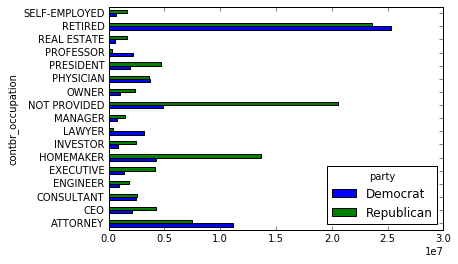

In [21]:
over_2mm.plot(kind='barh')

In [22]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()

    # Order totals by key in descending order
    return totals.sort_values(ascending=False)[-n:]
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  COMPUTER ASSISTANT                        3.0
               SPRINKLER FITTER FIRE PROTECTION SPECI    3.0
               ADMINISTRATION/INSTRUCTOR                 3.0
               LEAD UI/UX DEVELOPER                      3.0
               POLICY/ LAWYER                            3.0
               LAN/WAN ANALYST                           3.0
               SR MGR                                    3.0
Romney, Mitt   MD - UROLOGIST                            5.0
               DISTRICT REPRESENTATIVE                   5.0
               INDEPENDENT PROFESSIONAL                  3.0
               REMODELER & SEMI RETIRED                  3.0
               AFFORDABLE REAL ESTATE DEVELOPER          3.0
               IFC CONTRACTING SOLUTIONS                 3.0
               3RD GENERATION FAMILY BUSINESS OWNER      3.0
Name: contb_receipt_amt, dtype: float64

In [23]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                   
Obama, Barack  SOLIYA                                3.0
               CARR ENTERPRISES                      3.0
               PENN STATE DICKINSON SCHOOL OF LAW    3.0
               CADUCEUS OCCUPATIONAL MEDICINE        3.0
               N.A.                                  3.0
               REAL ENERGY CONSULTING SERVICES       3.0
               JPDSYSTEMS, LLC                       3.0
               CASS REGIONAL MED. CENTER             2.5
               ARCON CORP                            2.0
               THE VICTORIA GROUP, INC.              2.0
Romney, Mitt   EASTHAM CAPITAL                       5.0
               GREGORY GALLIVAN                      5.0
               DIRECT LENDERS LLC                    5.0
               LOUGH INVESTMENT ADVISORY LLC         4.0
               WATERWORKS INDUSRTIES                 3.0
               WILL MERRIFIELD                       3.0
               HONOLD COMMUNICTAIONS  

### 对出资额分组

In [24]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [25]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [26]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [27]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1), axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


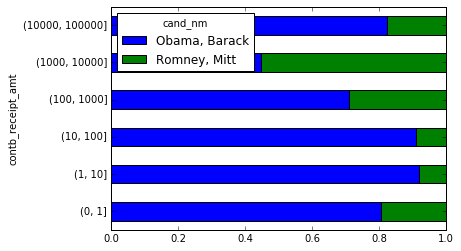

In [28]:
normed_sums[:-2].plot(kind='barh', stacked=True)

### 根据州统计赞助信息

In [29]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals = totals[totals.sum(1) > 100000]
totals[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [30]:
percent = totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224
